In [253]:
import numpy as np
from numpy.linalg import eig
import matplotlib.pyplot as plt

In [254]:
m = 1
K = 1
a = 1

Py = np.array([[0, 0], [0, 1]])
P1 = np.array([[3/4, np.sqrt(3)/4], [np.sqrt(3)/4, 1/4]])
P2 = np.array([[3/4, -np.sqrt(3)/4], [-np.sqrt(3)/4, 1/4]])

y = np.array([0, 1])
# these have nothing to do with the reciprocal lattice vectors
b1_hat = np.array([np.sqrt(3)/2, 0.5])
b2_hat = np.array([-np.sqrt(3)/2, 0.5])
k = np.array([0, 1])

A11 = -(Py + P1 + P2)
A12 = Py*np.exp(1j*k@y*a) + P1*np.exp(-1j*k@b1_hat*a) + P2*np.exp(-1j*k@b2_hat*a)
A21 = np.conjugate(A12)
A22 = -(Py + P1 + P2)

A = -K/m * np.block([
    [A11, A12],
    [A21, A22]
])

# print(np.array_str(A, precision=1, suppress_small=True))


In [255]:
def dispersion(k):
    A11 = -(Py + P1 + P2)
    A12 = Py*np.exp(1j*k@y*a) + P1*np.exp(-1j*k@b1_hat*a) + P2*np.exp(-1j*k@b2_hat*a)
    A21 = np.conjugate(A12)
    A22 = -(Py + P1 + P2)

    A = -K/m * np.block([
        [A11, A12],
        [A21, A22]
    ])

    w, v = eig(A)
    sort = np.argsort(w)
    return w[sort], v[:,sort]

In [256]:
N1 = 100
N2 = 100

ucell_vol = 1.5*np.sqrt(3)*(a**3)

b1 = 2*np.pi/ucell_vol * a**2 * np.array([3/2, -np.sqrt(3)/2])
b2 = 2*np.pi/ucell_vol * a**2 * np.array([-3/2, -np.sqrt(3)/2])

m1 = np.linspace(-N1/2, N1/2-1, N1)
m2 = np.linspace(-N2/2, N2/2-1, N2)

M1, M2 = np.meshgrid(m1, m2)

k_mat = np.outer(M1,1/N1*b1)+np.outer(M2,1/N2*b2)
k_mat = k_mat.reshape((N1,N2,2))

w = np.zeros((N1, N2, 4))

In [272]:
for i in range(k_mat.shape[0]):
    for j in range(k_mat.shape[1]):
        w[i,j,:], _ = dispersion(k_mat[i,j,:])

/tmp/ipykernel_1128/2414781949.py:3: ComplexWarning: Casting complex values to real discards the imaginary part
  w[i,j,:], _ = dispersion(k_mat[i,j,:])


In [273]:
w[:,:,0][w[:,:,0] < 1e-14] = 0
w[:,:,3][np.abs(w[:,:,3] - 3) < 1e-10] = 3

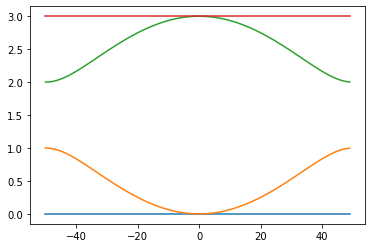

In [258]:
fig = plt.figure()
plt.plot(m2, w[:,:,0].diagonal())
plt.plot(m2, w[:,:,1].diagonal())
plt.plot(m2, w[:,:,2].diagonal())
plt.plot(m2, w[:,:,3].diagonal())

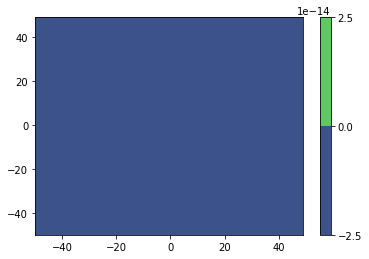

In [263]:
plt.contourf(M1, M2, w[:,:,0])
plt.colorbar()

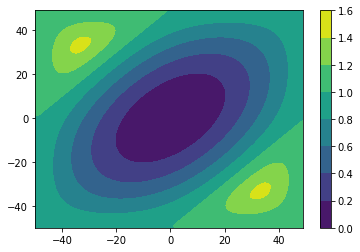

In [264]:
plt.contourf(M1, M2, w[:,:,1])
plt.colorbar()

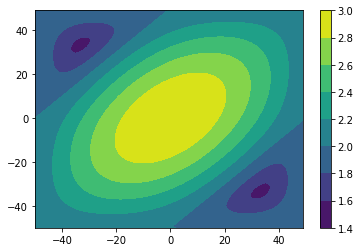

In [265]:
plt.contourf(M1, M2, w[:,:,2])
plt.colorbar()

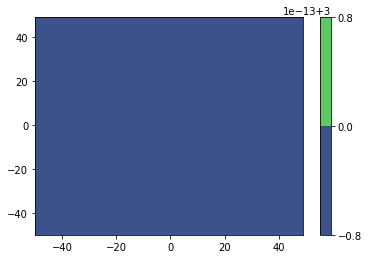

In [267]:
plt.contourf(M1, M2, w[:,:,3])
plt.colorbar()

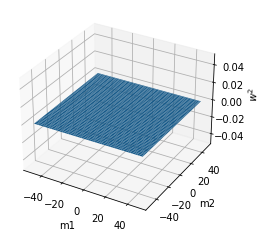

In [298]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_xlabel('m1')
ax.set_ylabel('m2')
ax.set_zlabel('$w^2$')
ax.plot_surface(M1, M2, w[:,:,0])
fig.savefig('4_1_w0.png', bbox_inches='tight')

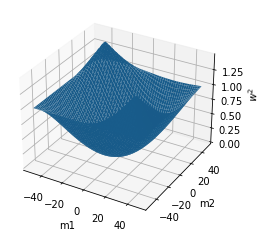

In [294]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_xlabel('m1')
ax.set_ylabel('m2')
ax.set_zlabel('$w^2$')
ax.plot_surface(M1, M2, w[:,:,1])
fig.savefig('4_1_w1.png')

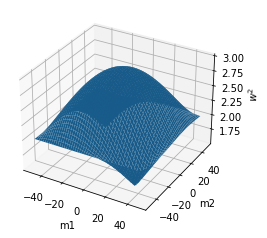

In [295]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_xlabel('m1')
ax.set_ylabel('m2')
ax.set_zlabel('$w^2$')
ax.plot_surface(M1, M2, w[:,:,2])
fig.savefig('4_1_w2.png')

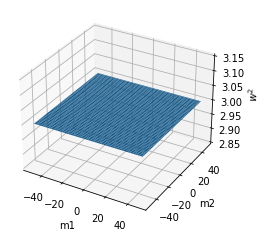

In [296]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
ax.set_xlabel('m1')
ax.set_ylabel('m2')
ax.set_zlabel('$w^2$')
ax.plot_surface(M1, M2, w[:,:,3])
plt.savefig('4_1_w3.png')

In [346]:
vol = N1*N2*a**2
beta = np.linspace(1, 100, 100)
w = np.sqrt(w)
w_beta = w[..., None] * beta
energy_density = (w[..., None] * np.ones(100))/vol * (0.5 + 1/(np.exp(w_beta) - 1))
for i in range(100):
    energy_density[:,:,:,i][np.isnan(energy_density[:,:,:,i])] = (1/beta[i])
energy_density_beta = np.sum(energy_density, (0,1,2))

/tmp/ipykernel_1128/2713751552.py:5: RuntimeWarning: divide by zero encountered in true_divide
  energy_density = (w[..., None] * np.ones(100))/vol * (0.5 + 1/(np.exp(w_beta) - 1))
/tmp/ipykernel_1128/2713751552.py:5: RuntimeWarning: invalid value encountered in multiply
  energy_density = (w[..., None] * np.ones(100))/vol * (0.5 + 1/(np.exp(w_beta) - 1))


Text(0, 0.5, '$\\left<\\varepsilon\\right>$')

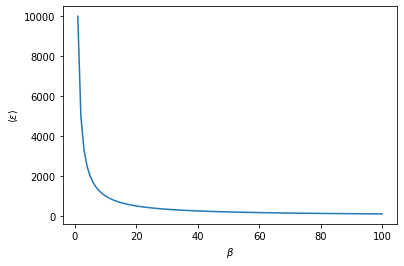

In [349]:
fig = plt.plot(beta, energy_density_beta) 
plt.xlabel(r'$\beta$')
plt.ylabel(r'$\left<\varepsilon\right>$')